# Customer Segmentation

본 대회의 주제는 이커머스 기업의 **고객을 세분화**하여 현재 기업의 상황을 판단하고, 해당 솔루션에 맞는 솔루션을 제시하는 것입니다.  
이를 위해 베이스라인에서는 기본적인 EDA를 수행한 후, 여러가지 방법으로 고객을 분류하겠습니다. 

### 라이브러리 불러오기(시각화 및 한글폰트) 

베이스라인을 위해 필요한 라이브러리들을 불러옵니다. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import datetime as dt
import numpy as np
# 한글 폰트 설정하기
#fe = fm.FontEntry(fname = 'MaruBuri-Regular.otf', name = 'MaruBuri')
#fm.fontManager.ttflist.insert(0, fe)
plt.rc('font', family='AppleGothic')

/var/folders/91/x1jkjm3549s21y3h3k_k56q80000gn/T/ipykernel_61453/3412006871.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/s/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 데이터 로드

대회 데이터를 불러옵니다. 

In [2]:
online_sales = pd.read_csv('Onlinesales_info.csv')
customers_data = pd.read_csv('Customer_info.csv')
discount_coupon = pd.read_csv('Discount_info.csv')
marketing_spend = pd.read_csv('Marketing_info.csv')
tax_amount = pd.read_csv('Tax_info.csv')

In [3]:
#total_data = 
online_sales.head(5)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [4]:
customers_data.head(5)

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [5]:
discount_coupon.head(5)

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [6]:
marketing_spend.head(5)

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [7]:
tax_amount.head(5)

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [8]:
### 성별에 따른 고객 분류, 고객을 성별에 따라 분류해보겠습니다. 

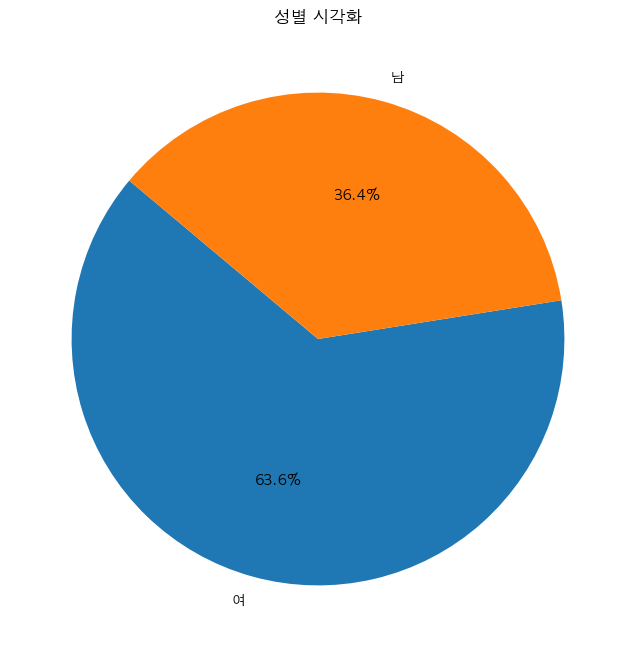

In [9]:
gender_counts = customers_data['성별'].value_counts()

# 원그래프 그리기
plt.figure(figsize=(8, 8))  # 그래프 크기 설정
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)  # 원그래프 그리기
plt.title('성별 시각화')  # 그래프 제목 설정
plt.show()  # 그래프 보여주기

### 지역에 따른 고객 분류

고객을 지역에 따라 분류해보겠습니다. 

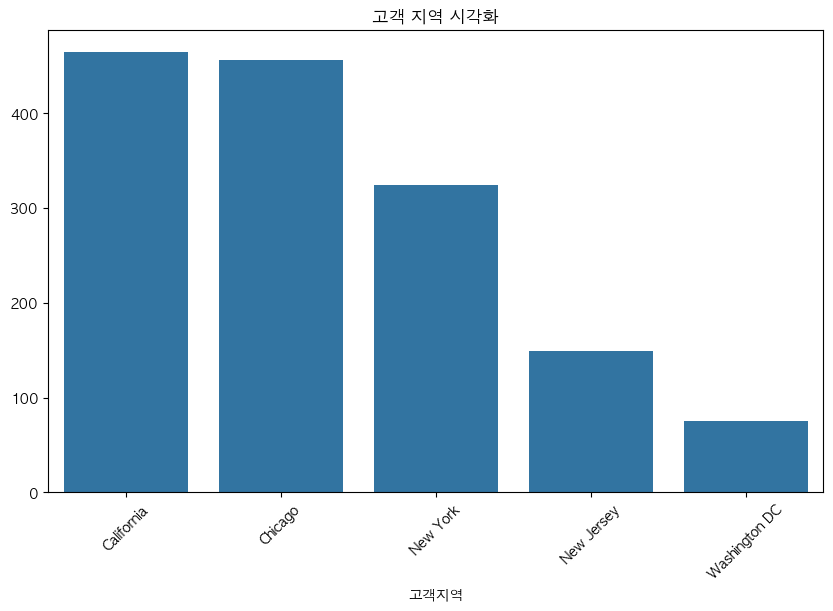

In [10]:
# customers_data에서 '고객지역' 열을 사용하여 지역별 거래량 계산
location_counts = customers_data['고객지역'].value_counts()

# 바 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
sns.barplot(x=location_counts.index, y=location_counts.values)  # seaborn을 사용한 바 그래프 그리기
plt.title('고객 지역 시각화')  # 그래프 제목 설정
plt.xlabel('고객지역')  # x축 레이블 설정
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()  # 그래프 보여주기

In [11]:
# 원본 데이터셋 복사
rfm_online_sales = online_sales.copy()

# 날짜 형식 변환
rfm_online_sales['거래날짜'] = pd.to_datetime(rfm_online_sales['거래날짜'])

# 데이터 내 마지막 날짜 계산
last_date = rfm_online_sales['거래날짜'].max()

# Recency 계산
recency_data = rfm_online_sales.groupby('고객ID')['거래날짜'].max().reset_index()
recency_data['Recency'] = (last_date - recency_data['거래날짜']).dt.days

# Frequency 계산
frequency_data = rfm_online_sales.groupby('고객ID')['거래ID'].count().reset_index()
frequency_data.rename(columns={'거래ID': 'Frequency'}, inplace=True)

# Monetary 계산
rfm_online_sales['SalesValue'] = rfm_online_sales['수량'] * rfm_online_sales['평균금액']
monetary_data = rfm_online_sales.groupby('고객ID')['SalesValue'].sum().reset_index()
monetary_data.rename(columns={'SalesValue': 'Monetary'}, inplace=True)

# RFM 데이터 결합
rfm_data = recency_data.merge(frequency_data, on='고객ID').merge(monetary_data, on='고객ID')

# Recency, Frequency, Monetary에 점수 부여
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 4, labels=[4, 3, 2, 1])
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 4, labels=[1, 2, 3, 4])
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], 4, labels=[1, 2, 3, 4])

# RFM 스코어 계산
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)


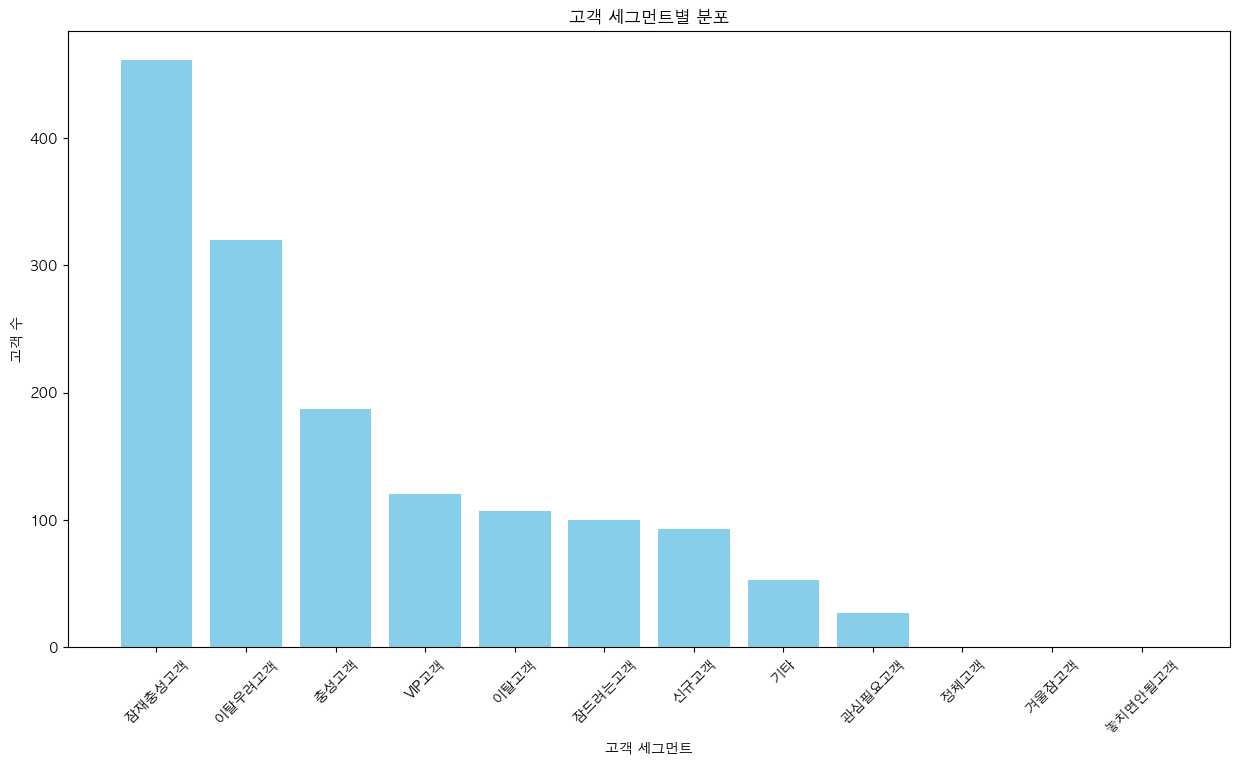

In [12]:
# 고객 세그먼트 분류 함수
def classify_customer_segment(row):
    R, F, M = row['R_Score'], row['F_Score'], row['M_Score']
    
    if R == 4 and F == 4 and M == 4:
        return 'VIP고객'
    elif R >= 2 and F >= 3 and M == 4:
        return '충성고객'
    elif R >= 3 and F <= 3 and M <= 3:
        return '잠재충성고객'
    elif R == 2 and F < 2 and M < 2:
        return '신규고객'
    elif R >= 3 and F < 2 and M < 2:
        return '정체고객'
    elif R >= 3 and F >= 3 and M >= 3:
        return '관심필요고객'
    elif 2 <= R <= 3 and F < 3 and M < 3:
        return '잠드려는고객'
    elif R < 3 and 2 <= F <= 4 and 2 <= M <= 4:
        return '이탈우려고객'
    elif R < 2 and F == 4 and M == 4:
        return '놓치면안될고객'
    elif 2 <= R <= 3 and 2 <= F <= 3 and 2 <= M <= 3:
        return '겨울잠고객'
    elif R < 2 and F < 2 and M < 2:
        return '이탈고객'
    else:
        return '기타'
    
# rfm_data에 'Customer_Segment' 컬럼 추가
rfm_data['Customer_Segment'] = rfm_data.apply(classify_customer_segment, axis=1)
# 가능한 모든 세그먼트 정의
all_segments = ['VIP고객', '충성고객', '잠재충성고객', '신규고객', '정체고객', '관심필요고객', 
                '잠드려는고객', '이탈우려고객', '놓치면안될고객', '겨울잠고객', '이탈고객', '기타']

# 각 세그먼트별 고객 수 계산
segment_counts = rfm_data['Customer_Segment'].value_counts()

# 모든 세그먼트에 대한 고객 수를 0으로 초기화하고, 계산된 값으로 업데이트
segment_counts_all = {segment: 0 for segment in all_segments}
segment_counts_all.update(segment_counts)

# 데이터프레임으로 변환
segment_counts_df = pd.DataFrame(list(segment_counts_all.items()), columns=['Segment', 'Count'])

# 세그먼트별 고객 수를 내림차순으로 정렬
segment_counts_sorted_df = segment_counts_df.sort_values(by='Count', ascending=False)

# 바 그래프 시각화
plt.figure(figsize=(15, 8))
plt.bar(segment_counts_sorted_df['Segment'], segment_counts_sorted_df['Count'], color='skyblue')
plt.title('고객 세그먼트별 분포')
plt.xlabel('고객 세그먼트')
plt.ylabel('고객 수')
plt.xticks(rotation=45)
plt.show()



In [13]:
df_total = pd.merge(online_sales, customers_data,on='고객ID')
df_total

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_total['고객ID'] = le.fit_transform(df_total['고객ID'])
le2 = LabelEncoder()
df_total['거래ID'] = le2.fit_transform(df_total['거래ID'])
le3 = LabelEncoder()
df_total['제품ID'] = le3.fit_transform(df_total['제품ID'])
le4 = LabelEncoder()
df_total['제품카테고리'] = le4.fit_transform(df_total['제품카테고리'])
le5 = LabelEncoder()
df_total['성별'] = le5.fit_transform(df_total['성별'])
le6 = LabelEncoder()
df_total['고객지역'] = le6.fit_transform(df_total['고객지역'])
le7 = LabelEncoder()
df_total['쿠폰상태'] = le7.fit_transform(df_total['쿠폰상태'])

le8 = LabelEncoder()
df_total['거래날짜'] = le7.fit_transform(df_total['거래날짜'])
df_total


,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,1358,0,0,981,16,1,153.71,6.50,2,0,1,12
1,1358,1,0,981,16,1,153.71,6.50,2,0,1,12
2,1358,2,0,904,18,1,2.05,6.50,2,0,1,12
3,1358,3,0,203,2,5,17.53,6.50,1,0,1,12
4,1358,3,0,848,4,1,16.50,6.50,2,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,504,17562,364,976,16,1,121.30,6.50,0,1,3,45
52920,504,17563,364,413,2,1,48.92,6.50,2,1,3,45
52921,504,17564,364,989,16,1,151.88,6.50,2,1,3,45
52922,562,17565,364,985,16,5,80.52,6.50,0,1,0,7


/Users/s/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


/Users/s/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/s/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


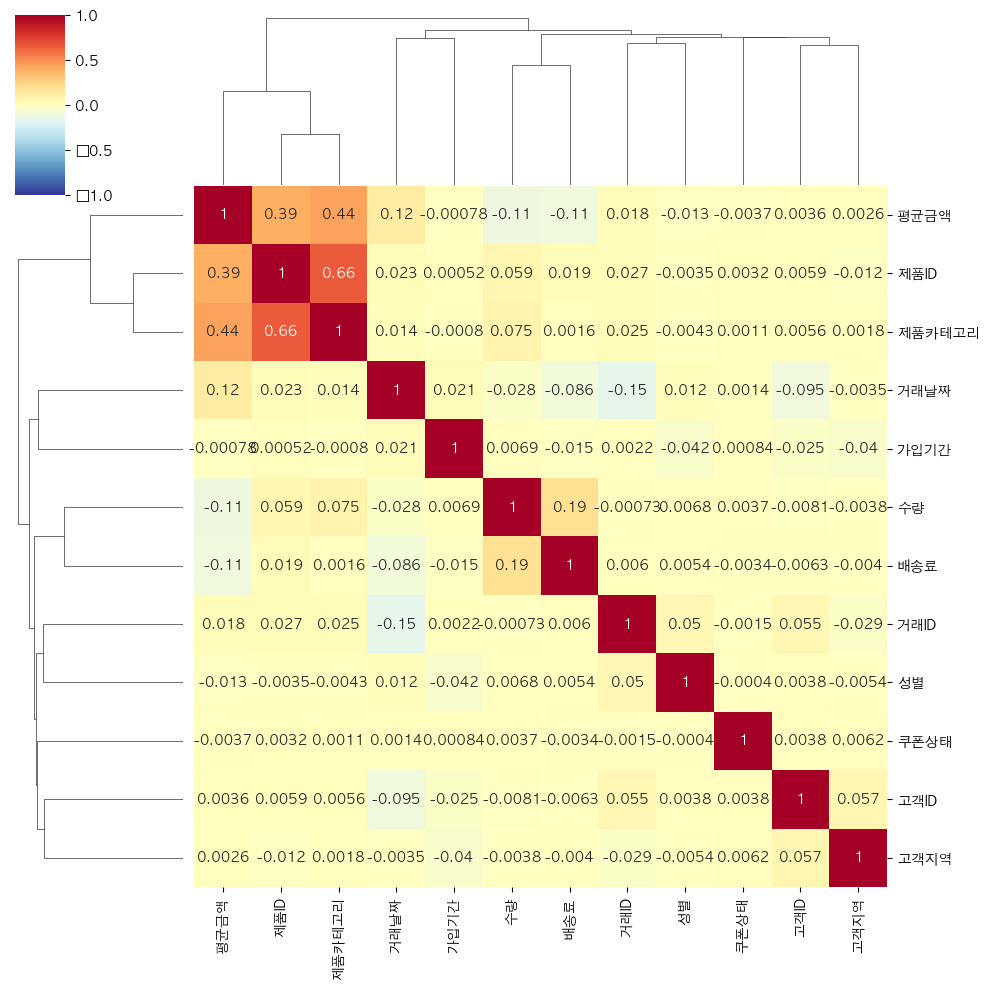

In [15]:
df = df_total.corr()

sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

In [16]:
#별 큰 의미는 없지만 상관관계(corr)를 확인해 보면, 배송료와 제품의 평균금액과 거래날짜간의 관계가 있어 보여서 확인해본다

In [17]:
delivery_fee = df_total.groupby('배송료')['배송료'].count().sort_values(ascending=False).to_frame().head(15)
delivery_fee

,배송료
배송료,
6.00,26801
6.50,15819
12.99,2532
19.99,1042
12.48,798
12.91,454
8.70,325
0.00,162
18.47,139


In [18]:
df_total

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,1358,0,0,981,16,1,153.71,6.50,2,0,1,12
1,1358,1,0,981,16,1,153.71,6.50,2,0,1,12
2,1358,2,0,904,18,1,2.05,6.50,2,0,1,12
3,1358,3,0,203,2,5,17.53,6.50,1,0,1,12
4,1358,3,0,848,4,1,16.50,6.50,2,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,504,17562,364,976,16,1,121.30,6.50,0,1,3,45
52920,504,17563,364,413,2,1,48.92,6.50,2,1,3,45
52921,504,17564,364,989,16,1,151.88,6.50,2,1,3,45
52922,562,17565,364,985,16,5,80.52,6.50,0,1,0,7


In [19]:
df_total['paid'] = df_total['평균금액']*df_total['수량']

In [20]:
df_total.groupby('배송료')['paid'].sum().sort_index()

배송료
0.00        19547.24
6.00      2075910.89
6.46          461.86
6.48          425.20
6.50      1614135.69
             ...    
354.00       1029.21
422.24       2611.43
492.84       1358.47
504.00       1561.25
521.36       1776.00
Name: paid, Length: 267, dtype: float64

<Axes: xlabel='배송료'>

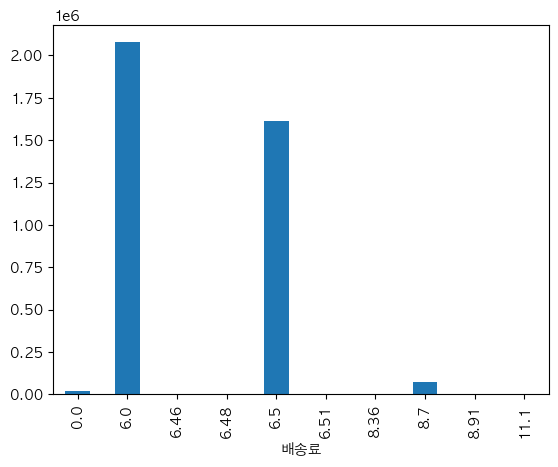

In [21]:
df_total.groupby('배송료')['paid'].sum().sort_index().head(10).plot(kind='bar')

<Axes: xlabel='배송료'>

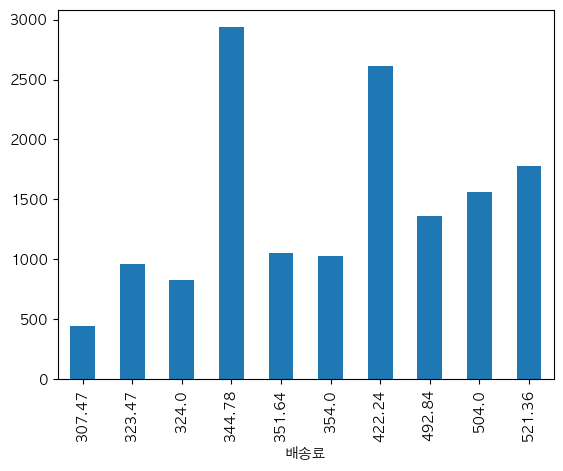

In [22]:
df_total.groupby('배송료')['paid'].sum().sort_index().tail(10).plot(kind='bar')

<Axes: xlabel='배송료'>

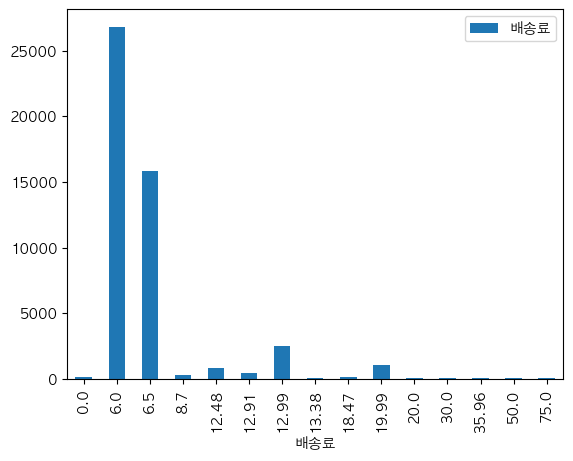

In [23]:
delivery_fee.sort_index().plot(kind='bar')

In [24]:
delivery_unit_price = df_total.groupby('배송료')['평균금액'].mean().sort_values(ascending=False)
delivery_unit_price

배송료
86.21    205.300000
31.45    199.000000
19.05    182.333333
8.70     158.110400
0.00     109.345556
            ...    
41.22      2.390000
85.33      2.310000
8.91       2.257143
79.32      1.990000
15.27      1.590000
Name: 평균금액, Length: 267, dtype: float64

<Axes: xlabel='배송료'>

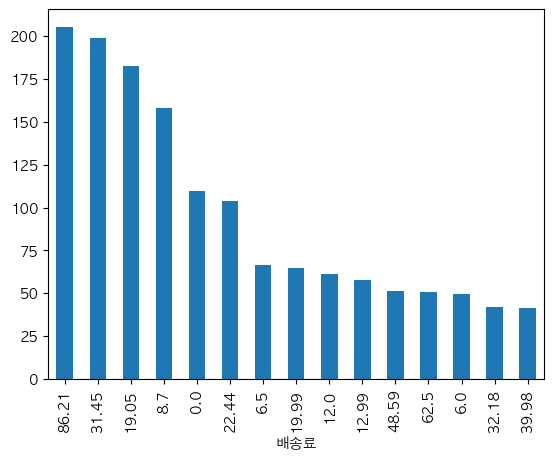

In [25]:
delivery_unit_price.head(15).plot(kind='bar')

<Axes: ylabel='제품카테고리'>

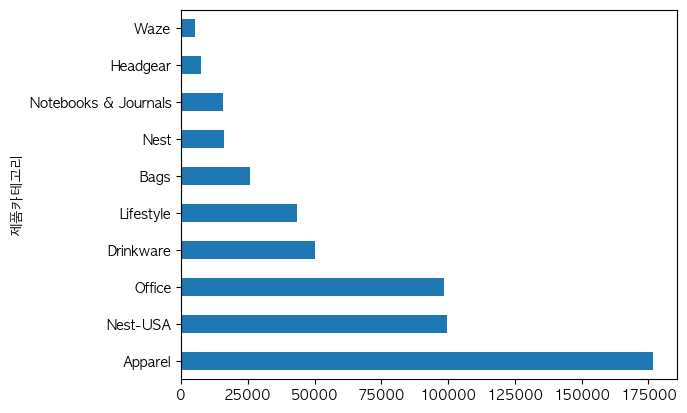

In [26]:
online_sales.groupby('제품카테고리')['배송료'].sum().sort_values(ascending=False).head(10).plot(kind='barh')



In [ ]:
for c in online_sales.columns:
    print(online_sales[c].value_counts())

고객ID
USER_0118    695
USER_0736    587
USER_0563    575
USER_1355    572
USER_0643    523
            ... 
USER_1327      1
USER_1296      1
USER_0738      1
USER_0290      1
USER_0366      1
Name: count, Length: 1468, dtype: int64
거래ID
Transaction_12261    35
Transaction_4716     30
Transaction_19047    29
Transaction_13487    28
Transaction_16759    27
                     ..
Transaction_10305     1
Transaction_10306     1
Transaction_10309     1
Transaction_10312     1
Transaction_25060     1
Name: count, Length: 25061, dtype: int64
거래날짜
2019-11-27    335
2019-07-13    311
2019-08-16    298
2019-08-02    292
2019-07-31    291
             ... 
2019-02-05     41
2019-01-28     39
2019-12-24     35
2019-08-20     32
2019-07-01     27
Name: count, Length: 365, dtype: int64
제품ID
Product_0981    3511
Product_0983    3328
Product_0976    3230
Product_0984    1361
Product_0989    1089
                ... 
Product_0147       1
Product_1056       1
Product_0528       1
Product_1014       1
P

<Axes: >

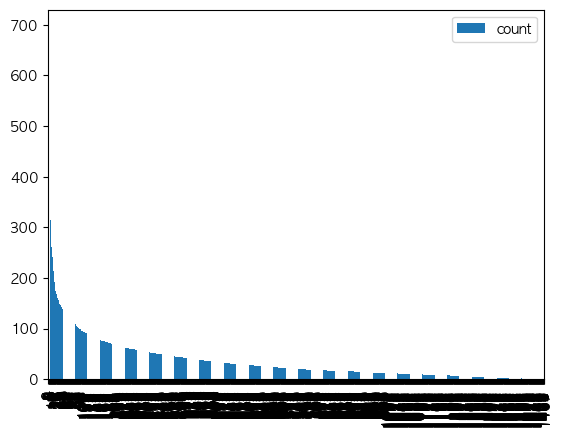

In [36]:
purchase_customers = online_sales['고객ID'].value_counts().reset_index()
purchase_customers.plot(kind='bar')

#구매패턴, 구매횟수가 높은 고객들의 특징을 더 알아보자

In [37]:
purchase_customers

,고객ID,count
0,USER_0118,695
1,USER_0736,587
2,USER_0563,575
3,USER_1355,572
4,USER_0643,523
...,...,...
1463,USER_0344,1
1464,USER_0345,1
1465,USER_0993,1
1466,USER_0633,1


In [38]:

purchase_customers[purchase_customers['count']>500]


,고객ID,count
0,USER_0118,695
1,USER_0736,587
2,USER_0563,575
3,USER_1355,572
4,USER_0643,523


In [39]:

purchase_customers[(purchase_customers['count']<=400) &
                    (purchase_customers['count']>300)]


,고객ID,count
5,USER_0202,366
6,USER_0667,315


In [40]:

purchase_customers[(purchase_customers['count']<=300) &
                    (purchase_customers['count']>200)]


,고객ID,count
7,USER_1358,297
8,USER_0572,290
9,USER_0200,261
10,USER_1218,260
11,USER_1433,250
12,USER_0234,242
13,USER_0482,241
14,USER_0094,223
15,USER_1267,213
16,USER_0850,210


In [41]:

purchase_customers[(purchase_customers['count']<200) &
                    (purchase_customers['count']>100)]


,고객ID,count
17,USER_0541,199
18,USER_1295,193
19,USER_0056,187
20,USER_0536,183
21,USER_0833,175
...,...,...
87,USER_1292,103
88,USER_0193,103
89,USER_1467,102
90,USER_0971,101


In [42]:

purchase_customers[(purchase_customers['count']<100) &
                    (purchase_customers['count']>50)]

,고객ID,count
94,USER_1289,99
95,USER_0835,99
96,USER_0266,98
97,USER_0041,98
98,USER_0795,96
...,...,...
315,USER_0442,51
316,USER_1334,51
317,USER_1018,51
318,USER_0084,51


In [43]:

purchase_customers[(purchase_customers['count']<50)]

,고객ID,count
331,USER_0914,49
332,USER_0669,49
333,USER_0135,49
334,USER_1280,49
335,USER_1187,49
...,...,...
1463,USER_0344,1
1464,USER_0345,1
1465,USER_0993,1
1466,USER_0633,1


<Axes: >

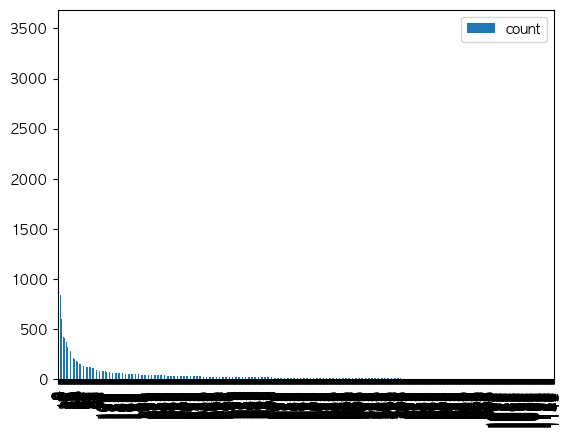

In [44]:
online_sales['제품ID'].value_counts().reset_index().plot(kind='bar')

In [45]:
coupon_transaction = online_sales[['쿠폰상태','거래ID', '거래날짜']]
coupon_transaction

,쿠폰상태,거래ID,거래날짜
0,Used,Transaction_0000,2019-01-01
1,Used,Transaction_0001,2019-01-01
2,Used,Transaction_0002,2019-01-01
3,Not Used,Transaction_0003,2019-01-01
4,Used,Transaction_0003,2019-01-01
...,...,...,...
52919,Clicked,Transaction_25056,2019-12-31
52920,Used,Transaction_25057,2019-12-31
52921,Used,Transaction_25058,2019-12-31
52922,Clicked,Transaction_25059,2019-12-31


<Axes: ylabel='count'>

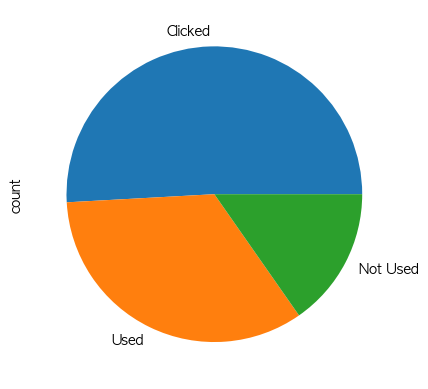

In [46]:
online_sales['쿠폰상태'].value_counts().plot(kind='pie')


In [47]:
coupon_transaction = coupon_transaction.assign(Month=pd.to_datetime(online_sales['거래날짜']).dt.to_period('M'))
#coupon_transaction['쿠폰상태'] = coupon_transaction['쿠폰상태'].replace('Used', 1).replace('Not Used',2).replace('Clicked',3)

coupon_transaction = coupon_transaction[['쿠폰상태', 'Month']]
coupon_transaction = coupon_transaction.groupby('Month')['쿠폰상태'].value_counts()

coupon_transaction=coupon_transaction.sort_index(level=0)

<Axes: xlabel='Month,쿠폰상태'>

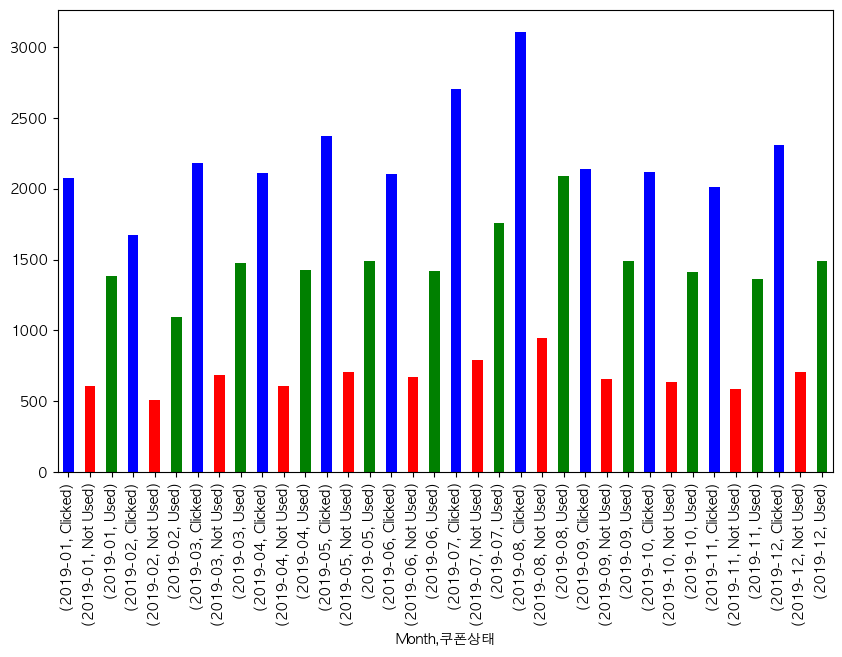

In [48]:
from itertools import cycle, islice

my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, 3))

coupon_transaction.plot(kind='bar',  stacked=True, color=my_colors, figsize=(10,6))

In [49]:
coupon_transaction

Month    쿠폰상태    
2019-01  Clicked     2075
         Not Used     605
         Used        1383
2019-02  Clicked     1675
         Not Used     511
         Used        1098
2019-03  Clicked     2183
         Not Used     687
         Used        1476
2019-04  Clicked     2114
         Not Used     606
         Used        1430
2019-05  Clicked     2376
         Not Used     704
         Used        1492
2019-06  Clicked     2106
         Not Used     668
         Used        1419
2019-07  Clicked     2705
         Not Used     789
         Used        1757
2019-08  Clicked     3109
         Not Used     948
         Used        2093
2019-09  Clicked     2143
         Not Used     655
         Used        1490
2019-10  Clicked     2119
         Not Used     635
         Used        1410
2019-11  Clicked     2014
         Not Used     583
         Used        1364
2019-12  Clicked     2307
         Not Used     703
         Used        1492
Name: count, dtype: int64

In [50]:
i=0
lst = []
res = []
for co in coupon_transaction.reset_index(drop=True):
    if  i>2 and i%3==0 :
        res.append(lst[2]/lst[0])
        lst = []
    lst.append(co)
    i +=1
res.append(lst[2]/lst[0]) 
    

In [51]:
res

[0.6665060240963856,
 0.6555223880597015,
 0.6761337608795236,
 0.6764427625354777,
 0.6279461279461279,
 0.6737891737891738,
 0.6495378927911275,
 0.6732068189128337,
 0.6952869808679422,
 0.6654082114204813,
 0.6772591857000994,
 0.646727351538795]

In [52]:
res = list(map(lambda x :round(x,4)-0.5,res))

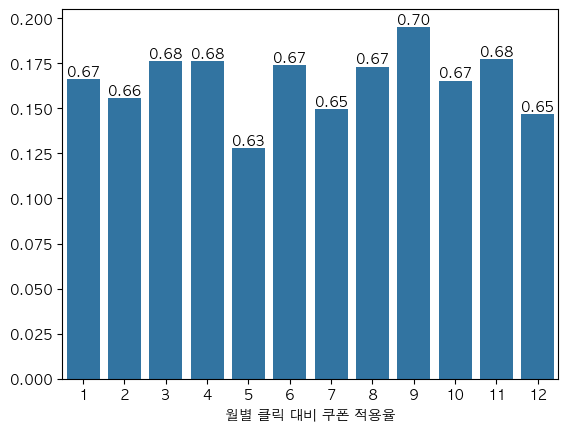

In [53]:
import matplotlib.pyplot as plt
ax = sns.barplot(x=np.arange(len(res))+1, y=res)
ax.bar_label(ax.containers[0], labels=[f'{e+0.5:.2f}' for e in res])
ax.set_xlabel('월별 클릭 대비 쿠폰 적용율')
#plt.axis('off')
plt.show()

In [54]:
#3,6,9,12월에 발급한 쿠폰 할인율이 30%으로 높았고 Marketing비용이 11,12월에 높았으나 그 효과가 미비하고, 여름7,8월의 쿠폰적용률이 높은 것으로 보아 연초부터 시작한 쿠폰 이벤트의 효과가 여름에 적용된 것으로 보임.
#또한, 클릭대비 실제 사용률은 9월이 가장 높았다.

In [55]:
customers_data.head(5)

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [56]:
discount_coupon.head(5)

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


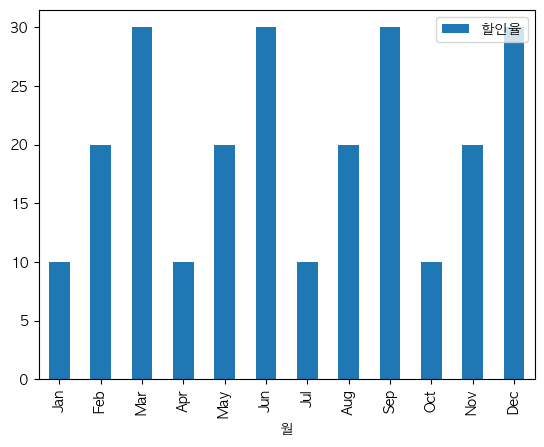

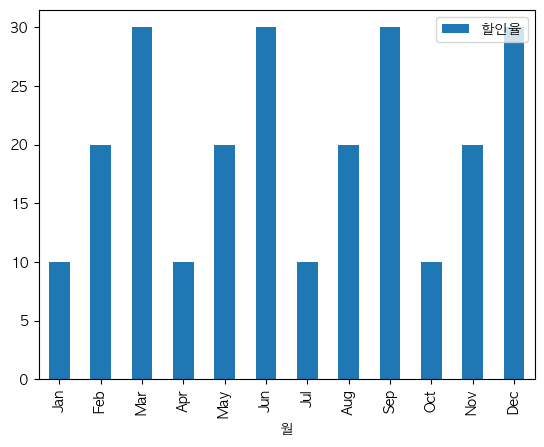

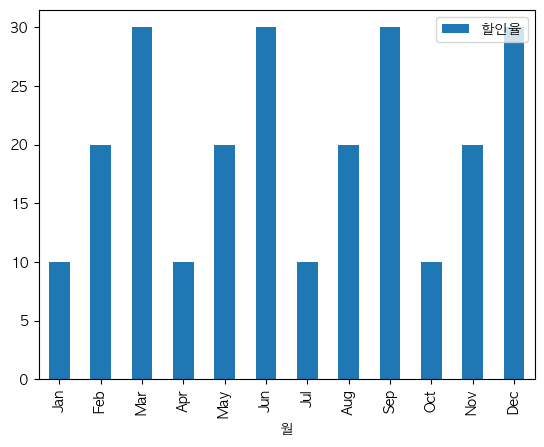

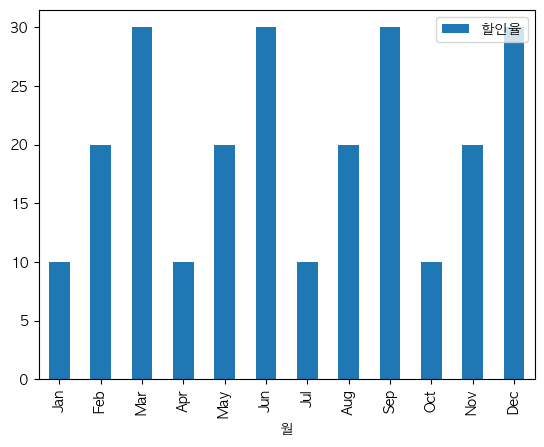

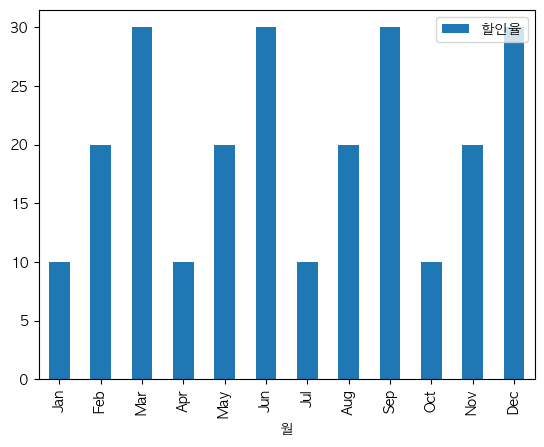

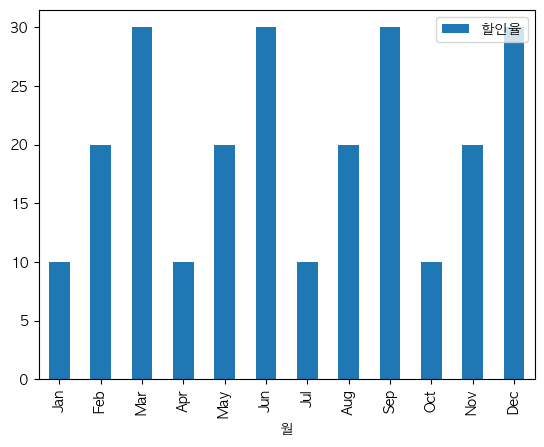

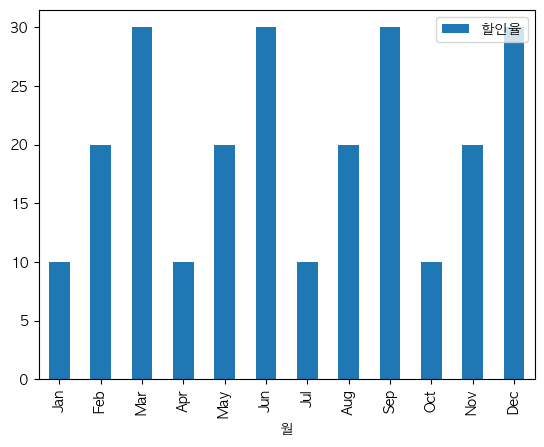

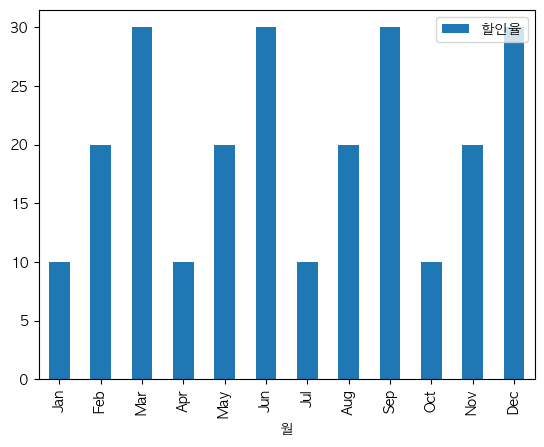

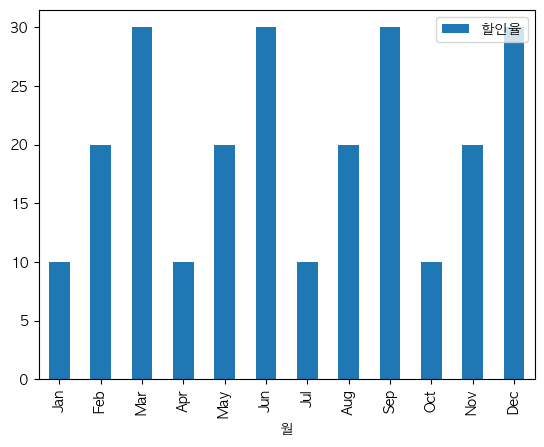

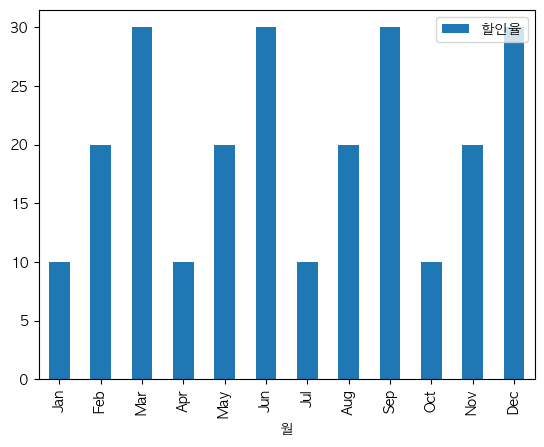

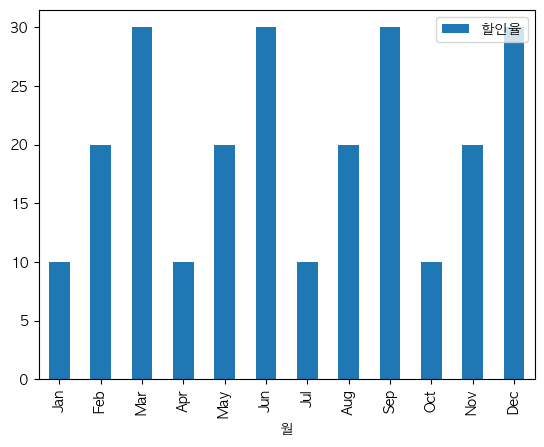

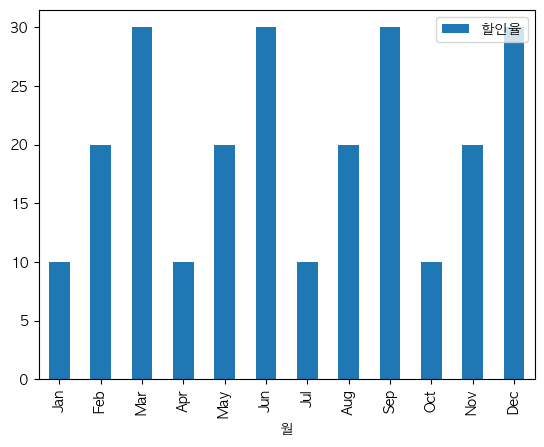

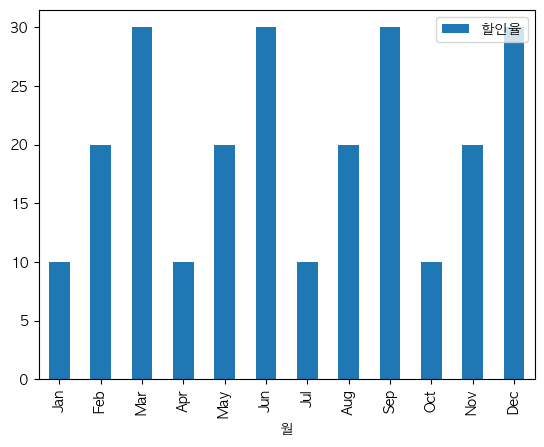

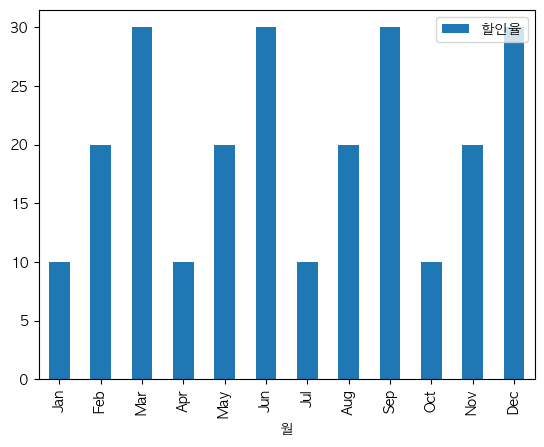

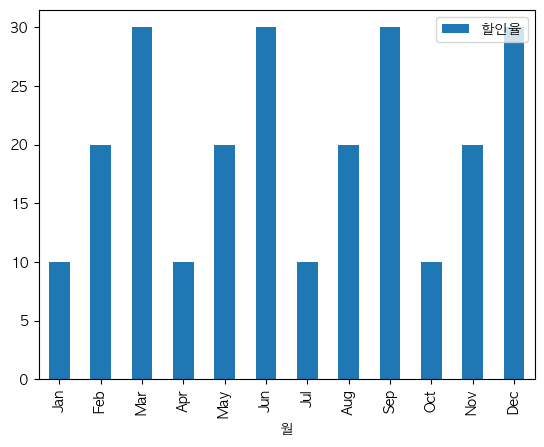

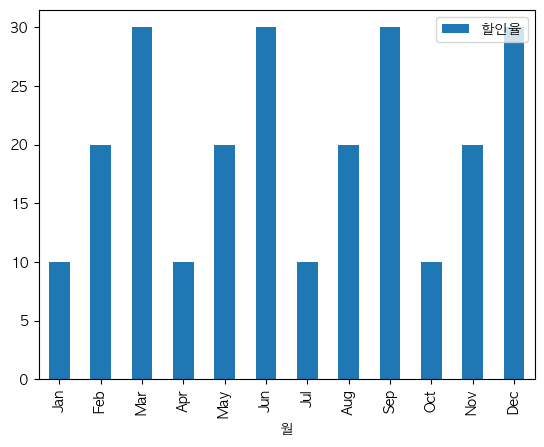

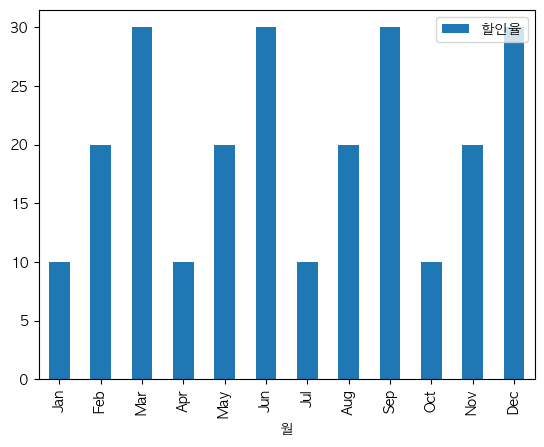

In [57]:
category_list = discount_coupon['제품카테고리'].unique()
for cl in category_list:
    discount_coupon[discount_coupon['제품카테고리']==cl].set_index('월').plot(kind='bar')    


In [58]:
marketing_spend.head(5)

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [59]:
marketing_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      365 non-null    object 
 1   오프라인비용  365 non-null    int64  
 2   온라인비용   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [60]:
marketing_spend.describe()

,오프라인비용,온라인비용
count,365.000000,365.000000
mean,2843.561644,1905.880740
std,952.292448,808.856853
min,500.000000,320.250000
25%,2500.000000,1258.600000
50%,3000.000000,1881.940000
75%,3500.000000,2435.120000
max,5000.000000,4556.930000


In [61]:
marketing_spend.head(-5)

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
355,2019-12-22,4500,2309.46
356,2019-12-23,4500,2199.69
357,2019-12-24,4000,3749.46
358,2019-12-25,4000,1133.70


<Axes: xlabel='Month'>

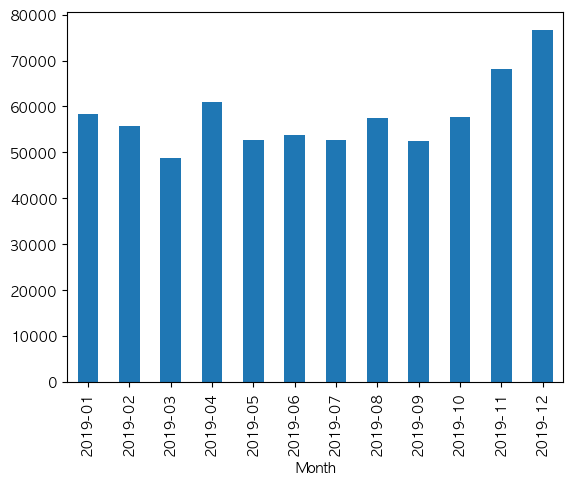

In [62]:

#counts_by_month = online_sales.assign(Month=pd.to_datetime(online_sales['거래날짜']).dt.to_period('M'))['Month'].value_counts().sort_index()
marketing_spend= marketing_spend.assign(Month=pd.to_datetime(marketing_spend['날짜']).dt.to_period('M'))
marketing_spend.groupby('Month')['온라인비용'].sum().plot(kind='bar')

<Axes: xlabel='Month'>

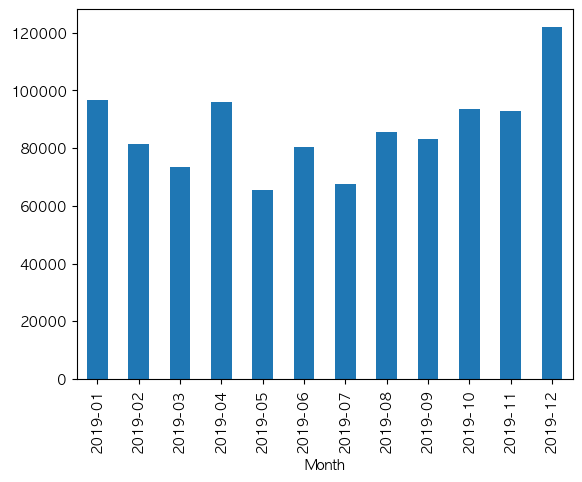

In [63]:
marketing_spend.groupby('Month')['오프라인비용'].sum().plot(kind='bar')

In [64]:
a = marketing_spend.groupby('Month')['온라인비용'].sum().to_frame().reset_index()
b = marketing_spend.groupby('Month')['오프라인비용'].sum().to_frame().reset_index()
a["온라인비용"]=a["온라인비용"].astype('int')
ax_list  = a.Month.astype(str).reset_index(drop=True)

Offline [ 96600  81300  73500  96000  65500  80500  67500  85500  83000  93500
  93000 122000]
Online [58328 55807 48750 61026 52759 53818 52717 57404 52514 57724 68144 76648]


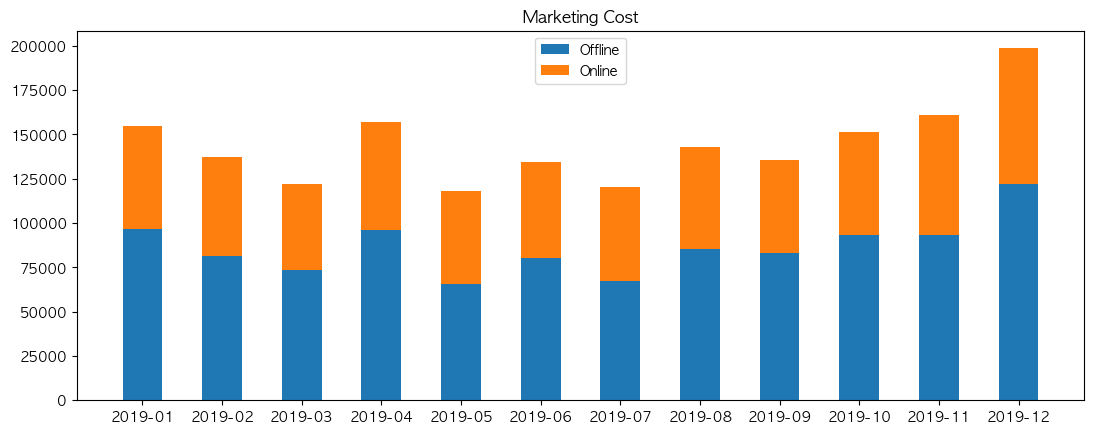

In [65]:
import matplotlib.pyplot as plt
import numpy as np
weight_counts = {
    
    "Offline": np.array(b['오프라인비용']),
    "Online": np.array(a['온라인비용']),
}
width = 0.5

fig, ax = plt.subplots()
fig.set_size_inches(13, fig.get_figheight(), forward=True)

bottom = np.zeros(12)
for boolean, weight_count in weight_counts.items():
    print(boolean, weight_count)
for boolean, weight_count in weight_counts.items():
    p = ax.bar(ax_list, weight_count , width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Marketing Cost")
ax.legend(loc="upper center")
plt.show()

In [163]:
tax_amount

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


<Axes: >

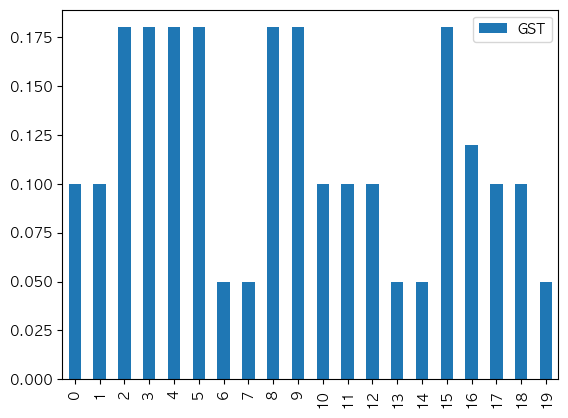

In [165]:
tax_amount.plot(kind='bar')

In [67]:
customers_data


,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [68]:
customer_regions = customers_data['고객지역'].value_counts().reset_index().set_index('고객지역')

customer_regions

,count
고객지역,
California,464
Chicago,456
New York,324
New Jersey,149
Washington DC,75


In [69]:
online_sales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [70]:
#카테고리 판매횟수
category_sales= online_sales['제품카테고리'].value_counts()


<Axes: ylabel='제품카테고리'>

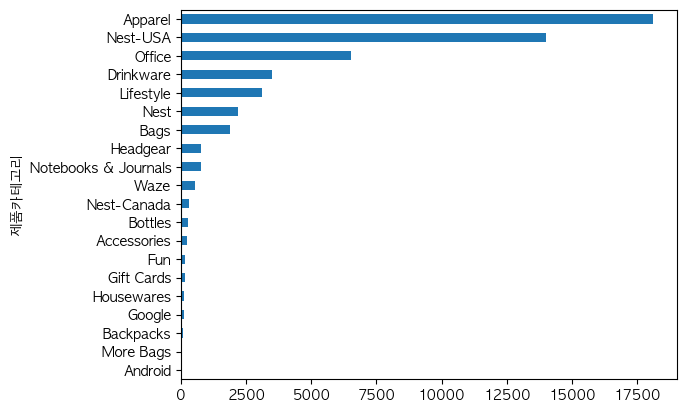

In [71]:
category_sales.sort_values().plot(kind='barh')

In [72]:
category_sales

제품카테고리
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: count, dtype: int64

In [73]:
category_sales.index[0]

'Apparel'

<Axes: xlabel='제품카테고리'>

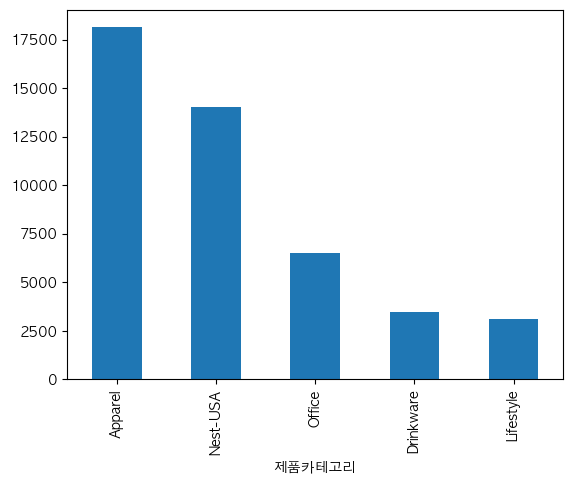

In [74]:
# 카테고리 판매횟수 상위
category_sales[:5].plot(kind='bar', y = 'count')


In [75]:
category_sales[:5]

제품카테고리
Apparel      18126
Nest-USA     14013
Office        6513
Drinkware     3483
Lifestyle     3092
Name: count, dtype: int64

In [76]:
category_sales[:5].index[0]


'Apparel'

In [77]:
online_sales_customers = pd.merge(online_sales, customers_data, on='고객ID')
online_sales_customers

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7


In [78]:
df_category_gender = pd.DataFrame()
for i in range(0, 5):
    category_name = category_sales[:5].index[i]
    df_category_gender[category_name]=(online_sales_customers[online_sales_customers['제품카테고리']==category_name].drop_duplicates(['고객ID'])['성별'].value_counts())
df_category_gender
    

,Apparel,Nest-USA,Office,Drinkware,Lifestyle
성별,,,,,
여,837,786,699,578,510
남,486,474,404,341,307


<Axes: title={'center': '\x08구매 카테고리별 성별분포'}, xlabel='성별'>

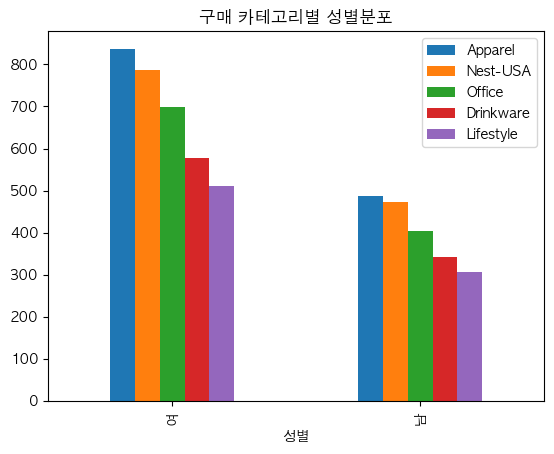

In [79]:
df_category_gender.plot(kind='bar', title="구매 카테고리별 성별분포")

In [80]:
df_category_gender2 = pd.DataFrame()
for i in range(0, 5):
    category_name = category_sales[:5].index[i]
    df_category_gender2[category_name]=(online_sales_customers[online_sales_customers['제품카테고리']==category_name])['성별'].value_counts()
df_category_gender2=df_category_gender2.transpose()
df_category_gender2

성별,여,남
Apparel,11355,6771
Nest-USA,8642,5371
Office,4178,2335
Drinkware,2181,1302
Lifestyle,1908,1184


<Axes: title={'center': '구매 카테고리별 판매누적회수 성별분포'}>

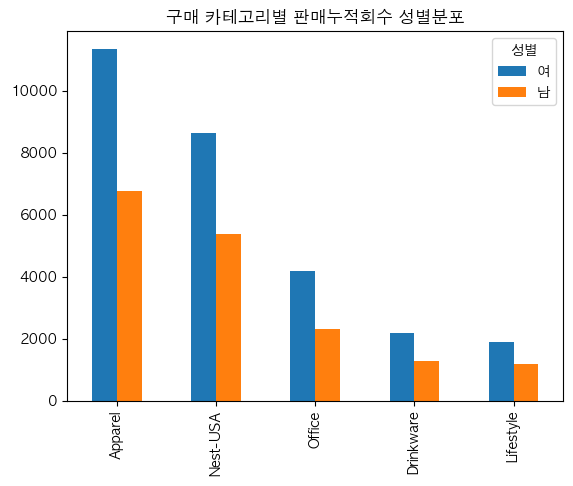

In [81]:
df_category_gender2.plot(kind='bar', title = '구매 카테고리별 판매누적회수 성별분포')

In [82]:
## Evidence 1:  상위 판매 카테고리 5개 중 모든 카테고리 구매자는 여성이 남성보다 높다.
#회원별/ 트랜잭션 ID로 보아도 모두 결과는 같으며, 트랜잭션결과가 편차가 더 크다

In [83]:
online_sales['total_sales'] = online_sales['수량']*online_sales['평균금액']

In [84]:
# 판매액이 높은 제품 카테고리순
order_high_purchase_category = online_sales.groupby('제품카테고리')['total_sales'].sum().sort_values(ascending=False)
order_high_purchase_category = order_high_purchase_category
order_high_purchase_category

제품카테고리
Nest-USA                2554202.39
Apparel                  591145.80
Nest                     518193.50
Office                   276794.40
Drinkware                200707.83
Bags                     151314.43
Notebooks & Journals     107085.96
Lifestyle                 74385.70
Nest-Canada               70910.40
Headgear                  53471.44
Gift Cards                19533.82
Google                     9420.47
Backpacks                  8772.69
Accessories                7295.88
Bottles                    6923.65
Waze                       6311.94
Fun                        6029.01
Housewares                 4637.32
More Bags                  2946.96
Android                     711.03
Name: total_sales, dtype: float64

<Axes: title={'center': '총 판매액이 높은 제품 카테고리순'}, xlabel='제품카테고리'>

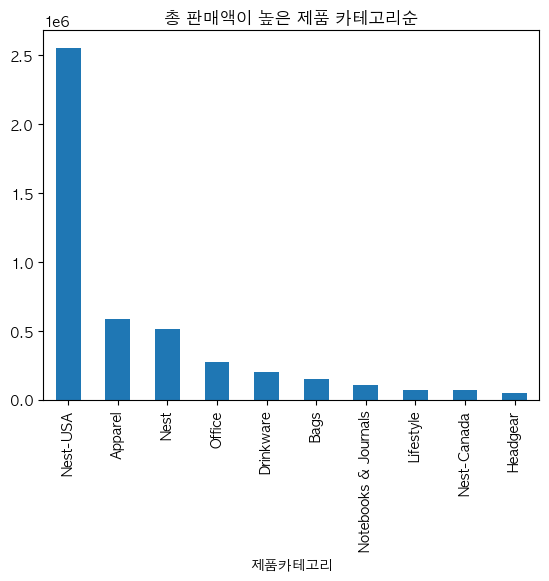

In [85]:
order_high_purchase_category.head(10).plot(kind='bar', title="총 판매액이 높은 제품 카테고리순")

In [86]:
order_high_purchase_category.reset_index()

,제품카테고리,total_sales
0,Nest-USA,2554202.39
1,Apparel,591145.80
2,Nest,518193.50
3,Office,276794.40
4,Drinkware,200707.83
5,Bags,151314.43
6,Notebooks & Journals,107085.96
7,Lifestyle,74385.70
8,Nest-Canada,70910.40
9,Headgear,53471.44


In [87]:
high_sales_category = order_high_purchase_category.reset_index().head(5)['제품카테고리']
high_sales_category

0     Nest-USA
1      Apparel
2         Nest
3       Office
4    Drinkware
Name: 제품카테고리, dtype: object

In [88]:

a = online_sales.sort_values(['total_sales', '고객ID'],ascending=False).where(online_sales['제품카테고리']=='Nest-USA').dropna()['고객ID'].drop_duplicates()
portion = len(a)//10
a.head(portion)

44320    USER_1331
46053    USER_0546
42863    USER_0482
46552    USER_0787
418      USER_1358
           ...    
37351    USER_0731
26548    USER_0718
42084    USER_0667
28648    USER_0665
23692    USER_0653
Name: 고객ID, Length: 126, dtype: object

In [89]:
len(a)//10

126

In [90]:
res = pd.DataFrame()
for hc in high_sales_category:
    a = online_sales.sort_values(['total_sales', '고객ID'],ascending=False).where(online_sales['제품카테고리']==hc).dropna()['고객ID'].drop_duplicates()
    portion = len(a)//10
    res = pd.concat([res, pd.DataFrame({'제품카테고리':hc , '고객ID':a.head(portion), '선정대상_사유':'총구매액_상위_10%_고객ID'})])
    
#res.to_csv(index=False, 'res.csv')
#print(res.to_csv(index=False))
    

In [91]:
online_sales.head(5)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,total_sales
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,16.50


In [92]:
online_sales2 = online_sales[['고객ID', '제품카테고리','total_sales']]
online_sales2 = online_sales2.drop_duplicates()
online_sales2

,고객ID,제품카테고리,total_sales
0,USER_1358,Nest-USA,153.71
2,USER_1358,Office,2.05
3,USER_1358,Apparel,87.65
4,USER_1358,Bags,16.50
5,USER_1358,Bags,77.25
...,...,...,...
52918,USER_0504,Nest,302.73
52920,USER_0504,Apparel,48.92
52921,USER_0504,Nest-USA,151.88
52922,USER_0562,Nest-USA,402.60


In [93]:
#카테고리별 우수고객(구매금액 상위)
#df.sort_values(['job','count'],ascending=False).groupby('job').head(3)
res02 = online_sales2.sort_values(['total_sales', '고객ID'], ascending=False).groupby('제품카테고리').head(3)
res02= res02.drop(['total_sales'], axis=1)
res02['선정대상_사유'] = '카테고리별 우수고객(구매금액 상위)'

res = pd.concat([res, res02])
res.to_csv('result.csv',index=False)
res02

,고객ID,제품카테고리,선정대상_사유
30192,USER_0703,Headgear,카테고리별 우수고객(구매금액 상위)
12163,USER_0118,Headgear,카테고리별 우수고객(구매금액 상위)
12166,USER_0736,Notebooks & Journals,카테고리별 우수고객(구매금액 상위)
12176,USER_0214,Office,카테고리별 우수고객(구매금액 상위)
34227,USER_0254,Notebooks & Journals,카테고리별 우수고객(구매금액 상위)
30224,USER_0039,Headgear,카테고리별 우수고객(구매금액 상위)
12171,USER_0736,Drinkware,카테고리별 우수고객(구매금액 상위)
15359,USER_0118,Drinkware,카테고리별 우수고객(구매금액 상위)
27273,USER_0447,Notebooks & Journals,카테고리별 우수고객(구매금액 상위)
14027,USER_0736,Apparel,카테고리별 우수고객(구매금액 상위)


In [94]:
customer_total_sales = pd.merge(customers_data, online_sales2, on='고객ID')
customer_total_sales

,고객ID,성별,고객지역,가입기간,제품카테고리,total_sales
0,USER_1358,남,Chicago,12,Nest-USA,153.71
1,USER_1358,남,Chicago,12,Office,2.05
2,USER_1358,남,Chicago,12,Apparel,87.65
3,USER_1358,남,Chicago,12,Bags,16.50
4,USER_1358,남,Chicago,12,Bags,77.25
...,...,...,...,...,...,...
35550,USER_0504,여,New York,45,Nest,302.73
35551,USER_0504,여,New York,45,Apparel,48.92
35552,USER_0504,여,New York,45,Nest-USA,151.88
35553,USER_0562,여,California,7,Nest-USA,402.60


In [95]:
over1000 = customer_total_sales.sort_values('total_sales',ascending=False).where(customer_total_sales['total_sales']>1000).dropna()
over1000

,고객ID,성별,고객지역,가입기간,제품카테고리,total_sales
13161,USER_0703,남,Chicago,33.0,Headgear,10512.39
2005,USER_0118,여,Chicago,28.0,Headgear,9495.00
327,USER_0736,여,Chicago,40.0,Notebooks & Journals,7495.00
16450,USER_0214,남,New Jersey,44.0,Office,6594.00
15060,USER_0254,남,California,46.0,Notebooks & Journals,5996.00
...,...,...,...,...,...,...
10080,USER_0799,여,New Jersey,34.0,Apparel,1031.13
27376,USER_0862,남,Chicago,22.0,Drinkware,1017.73
29378,USER_0028,여,New Jersey,50.0,Nest,1014.20
9429,USER_0062,여,Washington DC,23.0,Nest,1014.20


<Axes: xlabel='제품카테고리,성별'>

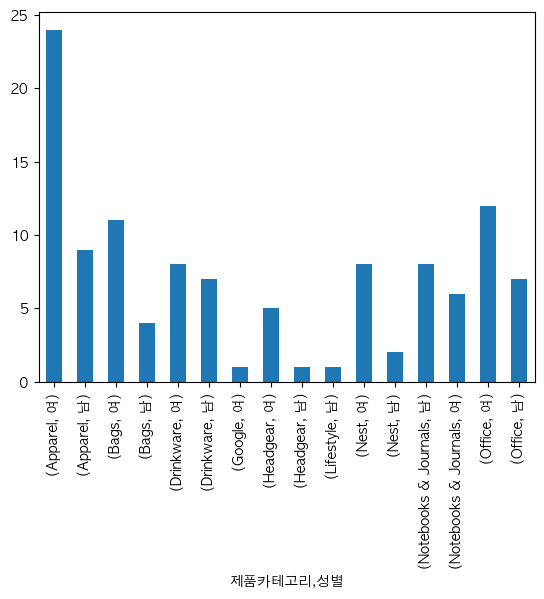

In [96]:
over1000.groupby('제품카테고리')['성별'].value_counts().plot(kind='bar')

<Axes: xlabel='제품카테고리,성별'>

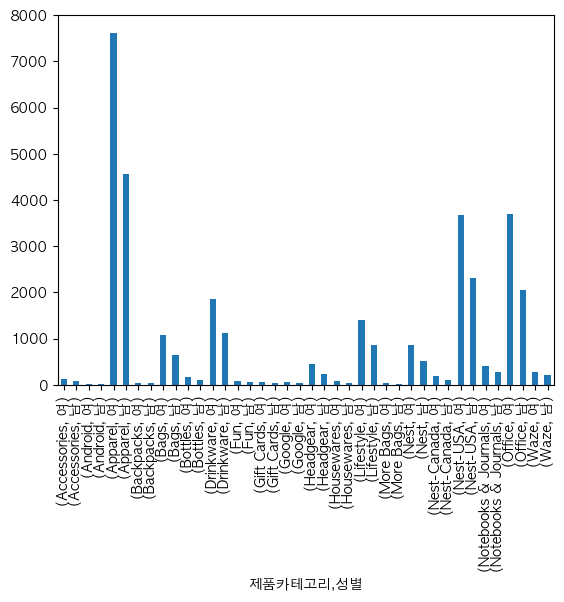

In [97]:
lower1000 = customer_total_sales.sort_values('total_sales',ascending=False).where(customer_total_sales['total_sales']<=1000).dropna()
lower1000.groupby('제품카테고리')['성별'].value_counts().plot(kind='bar')

In [98]:
prices_list = online_sales['배송료'].value_counts()
prices_list = prices_list.reset_index()
prices_list

,배송료,count
0,6.00,26801
1,6.50,15819
2,12.99,2532
3,19.99,1042
4,12.48,798
...,...,...
262,170.78,1
263,307.47,1
264,25.27,1
265,40.29,1


In [99]:
prices_list=prices_list[:100].sort_values('배송료')

In [100]:
prices_list[:50]

,배송료,count
7,0.00,162
0,6.00,26801
59,6.48,29
1,6.50,15819
91,6.51,18
6,8.70,325
96,11.10,17
4,12.48,798
18,12.76,87
5,12.91,454


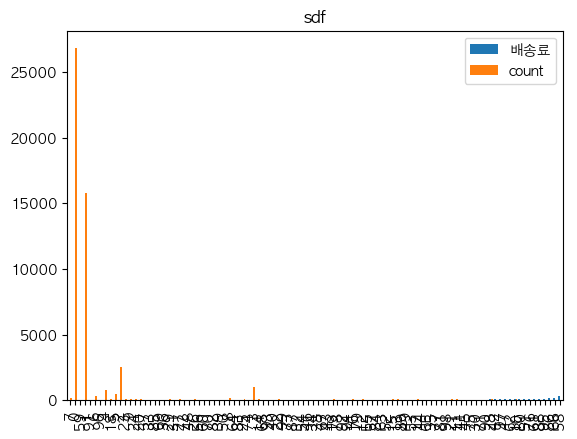

In [101]:

import matplotlib.pyplot as plt
prices_list.plot.bar(title='sdf', width=0.8)
plt.show()

In [102]:
customers_data.head(13)

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
5,USER_0730,남,California,32
6,USER_0585,여,New York,46
7,USER_1347,여,New Jersey,24
8,USER_0736,여,Chicago,40
9,USER_0541,남,California,43


In [103]:
online_sales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,total_sales
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,16.50
...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,121.30
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,48.92
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,151.88
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,402.60


In [104]:
#쿠폰사용 성비
df_total2 =  pd.merge(online_sales, customers_data,on='고객ID')
gender_coupon=df_total2 [['쿠폰상태','성별']].value_counts().reset_index()
gender_coupon = gender_coupon.transpose()
gender_coupon


,0,1,2,3,4,5
쿠폰상태,Clicked,Used,Clicked,Used,Not Used,Not Used
성별,여,여,남,남,여,남
count,16788,11152,10138,6752,5067,3027


In [105]:
round((gender_coupon[1]['count']/gender_coupon[0]['count']),3)


0.664

In [106]:
round((gender_coupon[3]['count']/gender_coupon[2]['count']),3)

0.666

In [107]:
df_total

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,paid
0,1358,0,0,981,16,1,153.71,6.50,2,0,1,12,153.71
1,1358,1,0,981,16,1,153.71,6.50,2,0,1,12,153.71
2,1358,2,0,904,18,1,2.05,6.50,2,0,1,12,2.05
3,1358,3,0,203,2,5,17.53,6.50,1,0,1,12,87.65
4,1358,3,0,848,4,1,16.50,6.50,2,0,1,12,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,504,17562,364,976,16,1,121.30,6.50,0,1,3,45,121.30
52920,504,17563,364,413,2,1,48.92,6.50,2,1,3,45,48.92
52921,504,17564,364,989,16,1,151.88,6.50,2,1,3,45,151.88
52922,562,17565,364,985,16,5,80.52,6.50,0,1,0,7,402.60


In [108]:
individual_total_sales = online_sales.groupby('고객ID')['total_sales'].sum().reset_index().sort_values('total_sales',ascending=False)
individual_total_sales

,고객ID,total_sales
736,USER_0736,75937.55
118,USER_0118,74601.36
563,USER_0563,57137.79
643,USER_0643,48980.38
1355,USER_1355,46205.77
...,...,...
346,USER_0346,2.79
1031,USER_1031,1.59
345,USER_0345,1.24
150,USER_0150,1.20


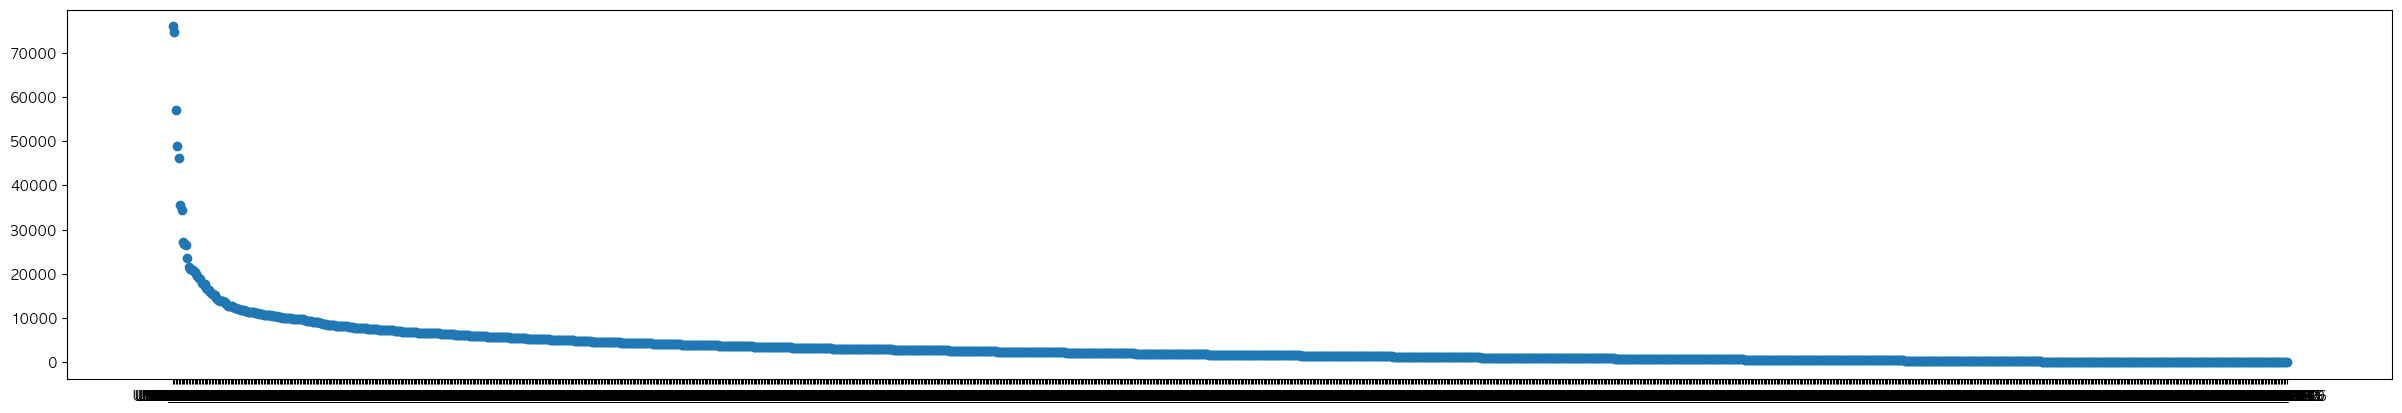

In [109]:

import matplotlib.pyplot as plt
y =  individual_total_sales['total_sales']
x =  individual_total_sales['고객ID']
fig = plt.figure()
plt.scatter(x,y)
fig.set_size_inches(30, fig.get_figheight(), forward=True)

plt.show()

In [110]:
individual_total_sales['total_sales'].quantile([0.25, 0.5, 0.75,1])

0.25      652.4125
0.50     1750.4100
0.75     3917.8875
1.00    75937.5500
Name: total_sales, dtype: float64

In [111]:
len(individual_total_sales[individual_total_sales['total_sales']>20000])

17

In [112]:
highly_pay_customer_group =individual_total_sales[individual_total_sales['total_sales']>=20000]
target_customer_group = individual_total_sales[ (individual_total_sales['total_sales']<20000 ) & (individual_total_sales['total_sales']>=10000 )]

In [113]:
customer_group_total_paid = [ individual_total_sales[individual_total_sales['total_sales']>=20000], 
individual_total_sales[ (individual_total_sales['total_sales']<20000 ) & (individual_total_sales['total_sales']>=10000 )],
individual_total_sales[ (individual_total_sales['total_sales']<10000 ) & (individual_total_sales['total_sales']>=5000 )],
individual_total_sales[ (individual_total_sales['total_sales']<5000 )] ]

In [114]:
len(customer_group_total_paid)

4

In [115]:
l = list(map(len, customer_group_total_paid))
l

[17, 64, 196, 1191]

In [116]:
#고객이 총 지불한 금액순으로 4개의 그룹을 만들어 볼 수 있다.
#각 그룹별로 특징을 살펴본다


<Axes: >

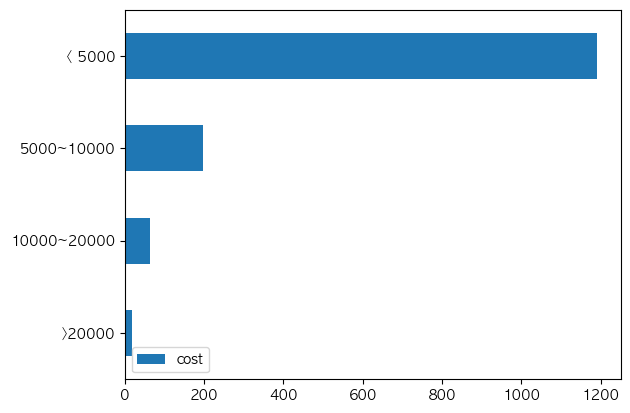

In [117]:
df_group_cost =pd.DataFrame({ "cost": l})
df_group_cost.index = ['>20000', '10000~20000','5000~10000', '< 5000']
df_group_cost.plot(kind='barh')

In [118]:
customers_data

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [119]:
df_group_cost

,cost
>20000,17
10000~20000,64
5000~10000,196
< 5000,1191


In [120]:

group1 = pd.merge(customer_group_total_paid[0], customers_data , on='고객ID')
group2 = pd.merge(customer_group_total_paid[1], customers_data , on='고객ID')
group3 = pd.merge(customer_group_total_paid[2], customers_data , on='고객ID')
group4 = pd.merge(customer_group_total_paid[3], customers_data , on='고객ID')
total_paid_group = [group1, group2,group3, group4 ]


In [121]:

group1['고객지역'].value_counts()

고객지역
Chicago          7
California       7
New Jersey       2
Washington DC    1
Name: count, dtype: int64

In [122]:
group2['고객지역'].value_counts()

고객지역
Chicago          21
California       18
New York         16
New Jersey        7
Washington DC     2
Name: count, dtype: int64

In [123]:
group3['고객지역'].value_counts()

고객지역
California       65
Chicago          56
New York         46
Washington DC    16
New Jersey       13
Name: count, dtype: int64

In [124]:
average_join_years = [group1['가입기간'].mean(), group2['가입기간'].mean(),group3['가입기간'].mean(),group4['가입기간'].mean()]
average_join_years

[28.176470588235293, 25.75, 26.255102040816325, 25.832073887489504]

In [125]:
average_join_years=np.array(average_join_years).astype(int)

In [126]:
average_join_years

array([28, 25, 26, 25])

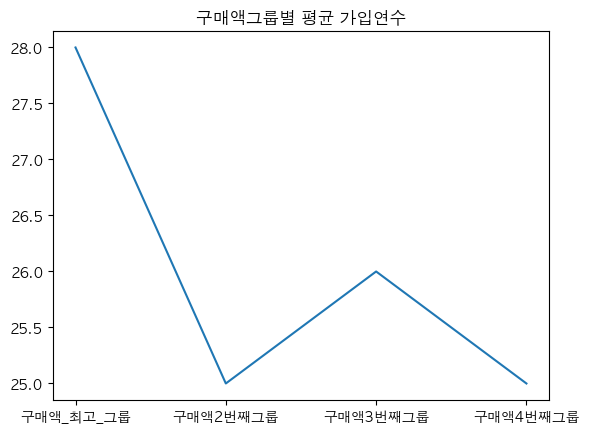

In [144]:
import matplotlib.pyplot as plt
label = ['구매액_최고_그룹', '구매액2번째그룹', '구매액3번째그룹','구매액4번째그룹']
values = average_join_years
plt.title('구매액그룹별 평균 가입연수')
plt.plot(label, average_join_years)
plt.show()

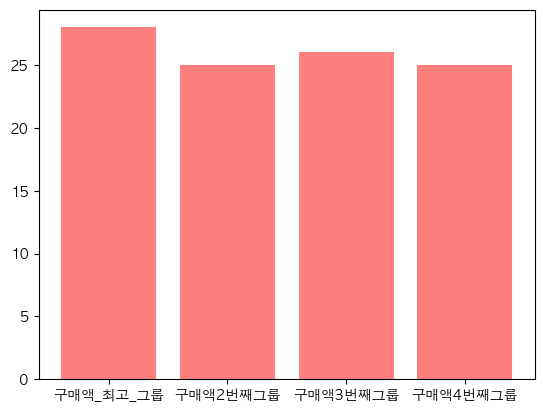

In [145]:
index = y
plt.bar(label, values, color='red',alpha=0.5)

plt.show()

In [146]:
tips_sum_by_day_male = [len(group1[group1['성별']=='남']),
                        len(group2[group2['성별']=='남']),
                        len(group3[group3['성별']=='남']),
                        len(group4[group4['성별']=='남'])]
tips_sum_by_day_female = [len(group1[group1['성별']=='여']),
                        len(group2[group2['성별']=='여']),
                        len(group3[group3['성별']=='여']),
                        len(group4[group4['성별']=='여'])
                        ]

In [151]:
tips_sum_by_day_female

[11, 36, 121, 766]

In [152]:
tips_sum_by_day_male

[6, 28, 75, 425]

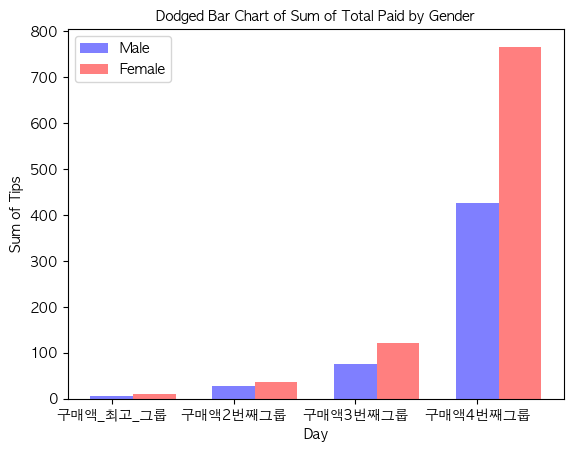

In [155]:
# Dodged Bar Chart (with same X coordinates side by side)
index = np.arange(4)
bar_width = 0.35
alpha = 0.5
p1 = plt.bar(index, tips_sum_by_day_male,bar_width,color='b',alpha=alpha,label='Male')
p2 = plt.bar(index + bar_width, tips_sum_by_day_female,
            bar_width,color='r',alpha=alpha,label='Female')
plt.title('Dodged Bar Chart of Sum of Total Paid by Gender', fontsize=10)
plt.ylabel('Sum of Tips', fontsize=10)
plt.xlabel('Day', fontsize=10)
plt.xticks(index, label, fontsize=10)
plt.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize=10)
plt.show()


In [148]:
discount_coupon.head(3)

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30


In [149]:
marketing_spend.head(5)

,날짜,오프라인비용,온라인비용,Month
0,2019-01-01,4500,2424.50,2019-01
1,2019-01-02,4500,3480.36,2019-01
2,2019-01-03,4500,1576.38,2019-01
3,2019-01-04,4500,2928.55,2019-01
4,2019-01-05,4500,4055.30,2019-01


In [150]:
tax_amount.head(5)

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


### 데이터 관찰하기

불러온 데이터를 관찰해 봅시다. 대표적으로 onlines_sales를 확인해 보겠습니다. 

In [133]:
online_sales.head(3)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,total_sales
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,2.05


### 시간에 따른 거래량 확인하기

시간에 따른 거래량을 시각화로 파악해보겠습니다. 

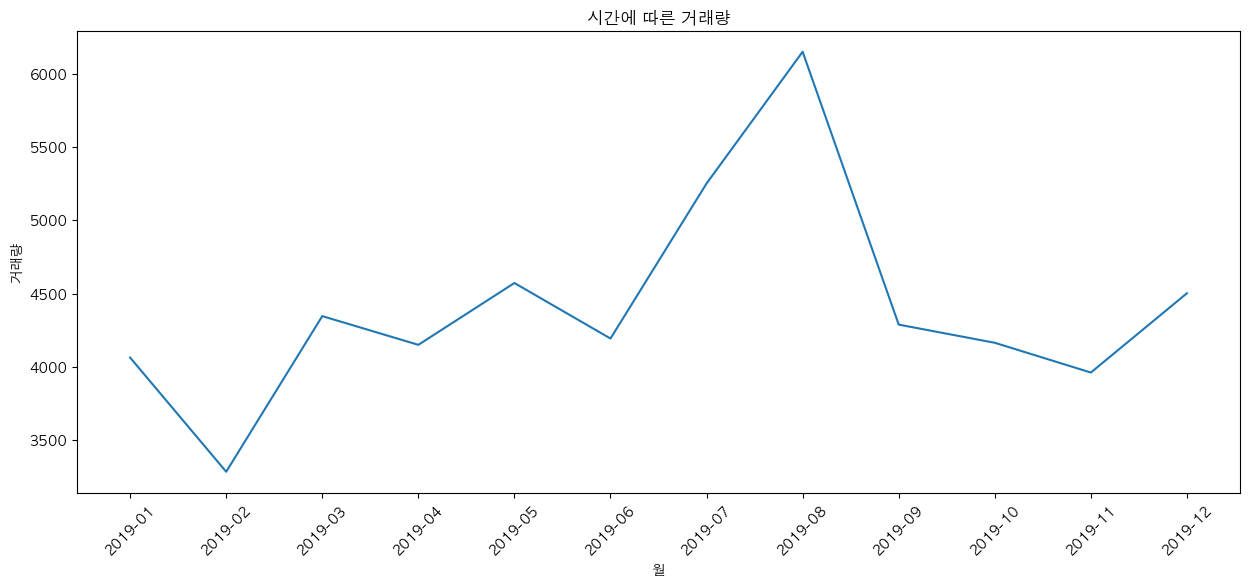

In [134]:
# 'Transaction_Date' 컬럼을 날짜 타입으로 변환하고 월별로 집계
# 'Month' 컬럼으로 거래량 계산
counts_by_month = online_sales.assign(Month=pd.to_datetime(online_sales['거래날짜']).dt.to_period('M'))['Month'].value_counts().sort_index()

# 시간에 따른 거래량 선 그래프 그리기
plt.figure(figsize=(15, 6))
sns.lineplot(x=counts_by_month.index.astype(str), y=counts_by_month.values)
plt.title('시간에 따른 거래량')
plt.xlabel('월')
plt.ylabel('거래량')
plt.xticks(rotation=45)
plt.show()

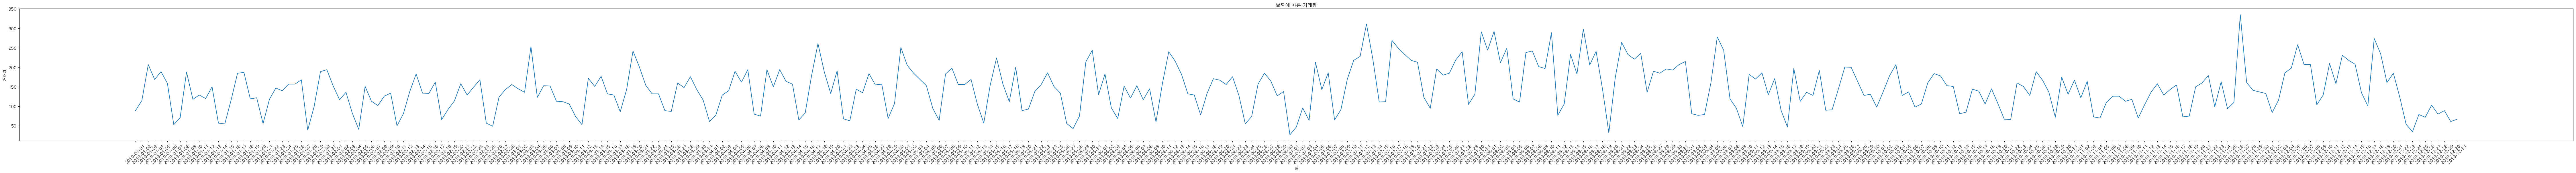

In [135]:
# 'Transaction_Date' 컬럼을 날짜 타입으로 변환하고 월별로 집계
# 'Day' 컬럼으로 거래량 계산
counts_by_day= online_sales.assign(Day=pd.to_datetime(online_sales['거래날짜']).dt.to_period('D'))['Day'].value_counts().sort_index()

# 날짜에 따른 거래량 선 그래프 그리기
plt.figure(figsize=(115, 6))
sns.lineplot(x=counts_by_day.index.astype(str), y=counts_by_day.values)
plt.title('날짜에 따른 거래량')
plt.xlabel('일')
plt.ylabel('거래량')
plt.xticks(rotation=45)
plt.show()

In [136]:
#위 차트에서 일정적으로 높고 낮음의 주기(Trend)가 있음

In [137]:
day_sales = online_sales.assign(Day=pd.to_datetime(online_sales['거래날짜']).dt.to_period('D'))['Day'].value_counts()
day_sales = day_sales.reset_index()
day_sales


,Day,count
0,2019-11-27,335
1,2019-07-13,311
2,2019-08-16,298
3,2019-08-02,292
4,2019-07-31,291
...,...,...
360,2019-02-05,41
361,2019-01-28,39
362,2019-12-24,35
363,2019-08-20,32


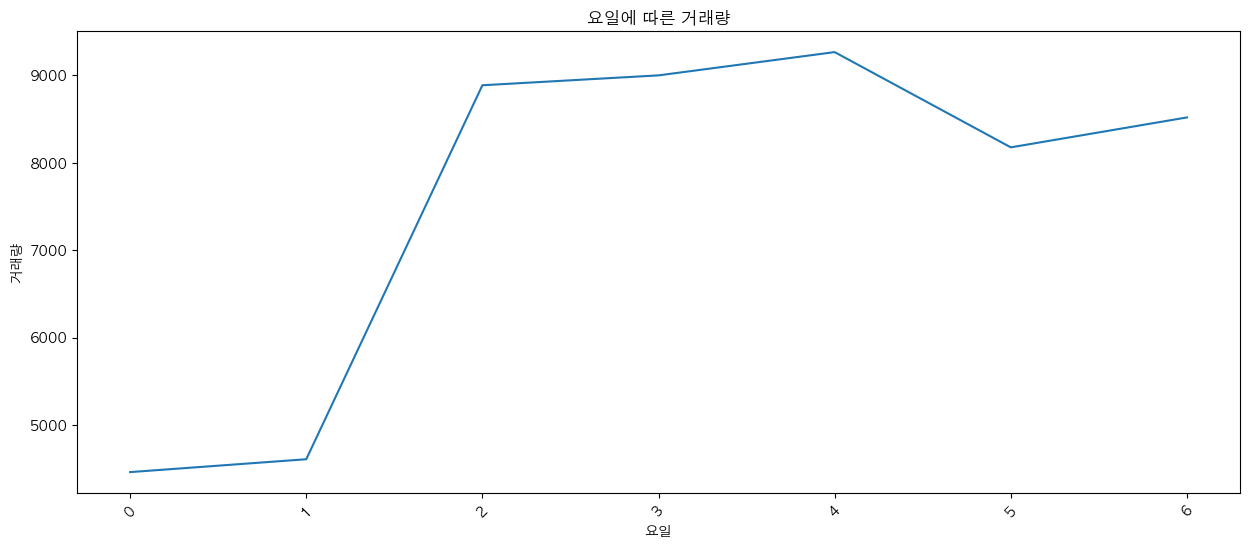

In [138]:
day_sales['day_of_week'] = day_sales.Day.dt.day_of_week
day_sale= day_sales.groupby("day_of_week")['count'].sum()

# 날짜에 따른 거래량 선 그래프 그리기
plt.figure(figsize=(15, 6))
sns.lineplot(x=day_sale.index.astype(str), y=day_sale.values)
plt.title('요일에 따른 거래량')
plt.xlabel('요일')
plt.ylabel('거래량')
plt.xticks(rotation=45)
plt.show()

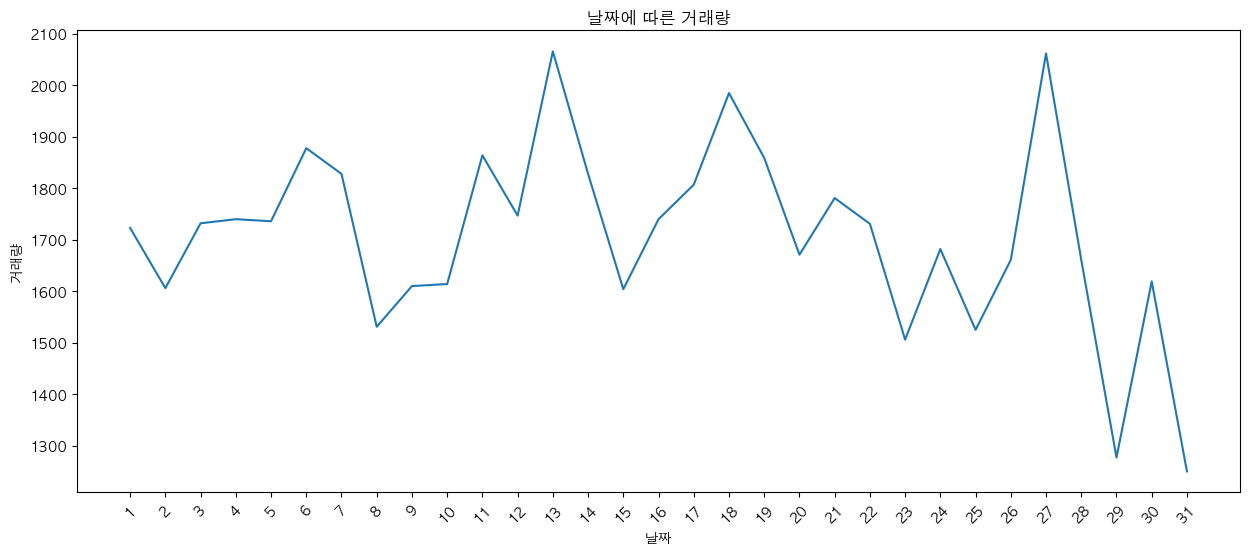

In [139]:
day_sales['days_in_month'] = day_sales.Day.dt.day
day_sales2 = day_sales.groupby("days_in_month")['count'].sum()
# 날짜에 따른 거래량 선 그래프 그리기
plt.figure(figsize=(15, 6))
sns.lineplot(x=day_sales2.index.astype(str), y=day_sales2.values)
plt.title('날짜에 따른 거래량')
plt.xlabel('날짜')
plt.ylabel('거래량')
plt.xticks(rotation=45)
plt.show()